In [48]:
using Plots
include("../src/TreeLevelBispectrum.jl")
include("../src/power_spectrum.jl")
include("../src/bispectrum_multipoles.jl")

B00_itp (generic function with 1 method)

In [49]:
pkfunc = init_linear_pk("../data/test_pk.txt");

In [50]:
tree_level_b00(0.1, 0.1, 0.1, 2, 1, 0.5, pkfunc)

1.199189601750972e9

In [51]:
kkk = kkk_grid(0.005, 0.01, 30);

In [52]:
b00 = zeros(2600)
b00integrated = zeros(2600)
for i in 1:2600
    k1, k2, k3 = kkk[:,i]
    b00[i] = tree_level_b00(k1, k2, k3, 2, 1, 0.5, pkfunc)
    b00integrated[i] = B00(k1, k2, k3, 2, 1, 0.5, pkfunc, tree_level_bk)
end

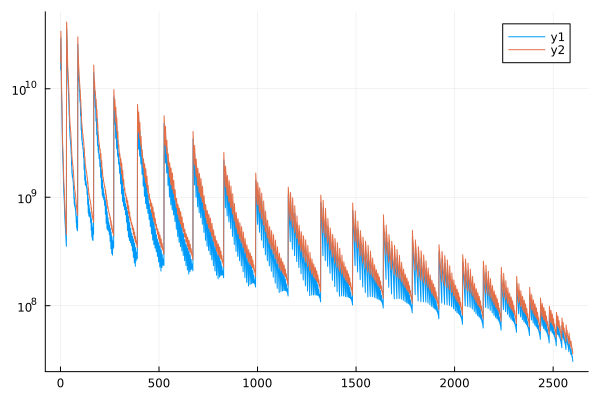

In [53]:
plot(b00, yaxis=:log)
plot!(b00integrated)

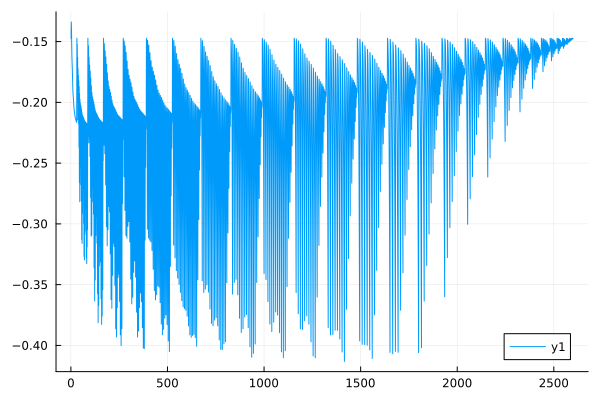

In [54]:
plot((b00 .- b00integrated)./b00integrated)

In [8]:
B00(1, 1, 1, 1, 0, 0, pkfunc, tree_level_bk)/pkfunc(1)^2

3.8571428571428568